In [1]:
import pandas as pd
import numpy as np
from pytrends.request import TrendReq

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Bitcoin

In [2]:
data = pd.read_csv('../../data/processed/ETH-USD_all.csv', index_col='Date', parse_dates=True)

In [3]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close,2906.0,1.649550e+03,1.289622e+03,8.430830e+01,3.335617e+02,1.624736e+03,2.608549e+03,4.831349e+03
High,2906.0,1.692993e+03,1.322515e+03,8.534274e+01,3.412967e+02,1.654603e+03,2.676123e+03,4.953733e+03
Low,2906.0,1.600148e+03,1.253012e+03,8.282989e+01,3.185593e+02,1.579293e+03,2.530407e+03,4.718039e+03
Open,2906.0,1.647945e+03,1.288692e+03,8.427969e+01,3.323458e+02,1.623011e+03,2.606903e+03,4.831088e+03
Volume,2906.0,1.453667e+10,1.184982e+10,6.217330e+08,6.143213e+09,1.185282e+10,1.917955e+10,7.839821e+10


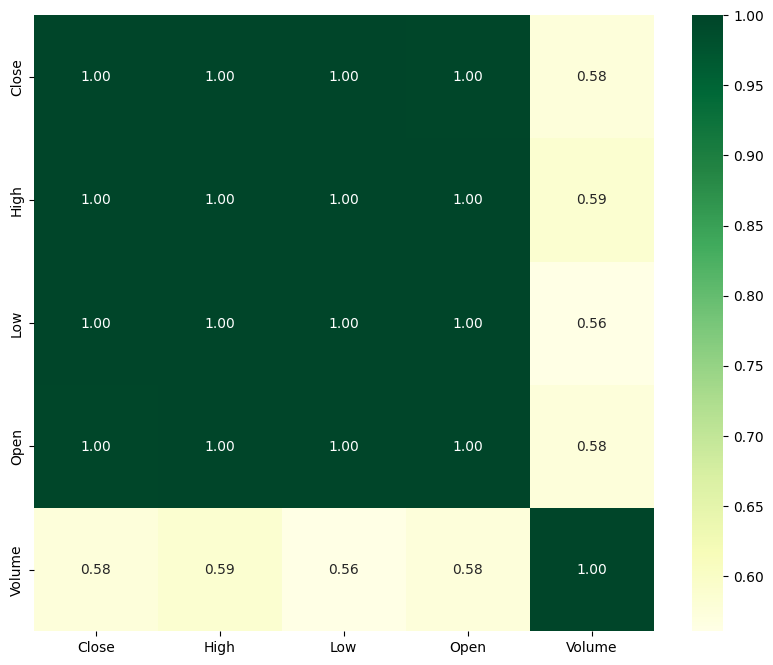

In [4]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(data.corr(), annot=True, cmap="YlGn", fmt=".2f")
plt.show()

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
data_scaled = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

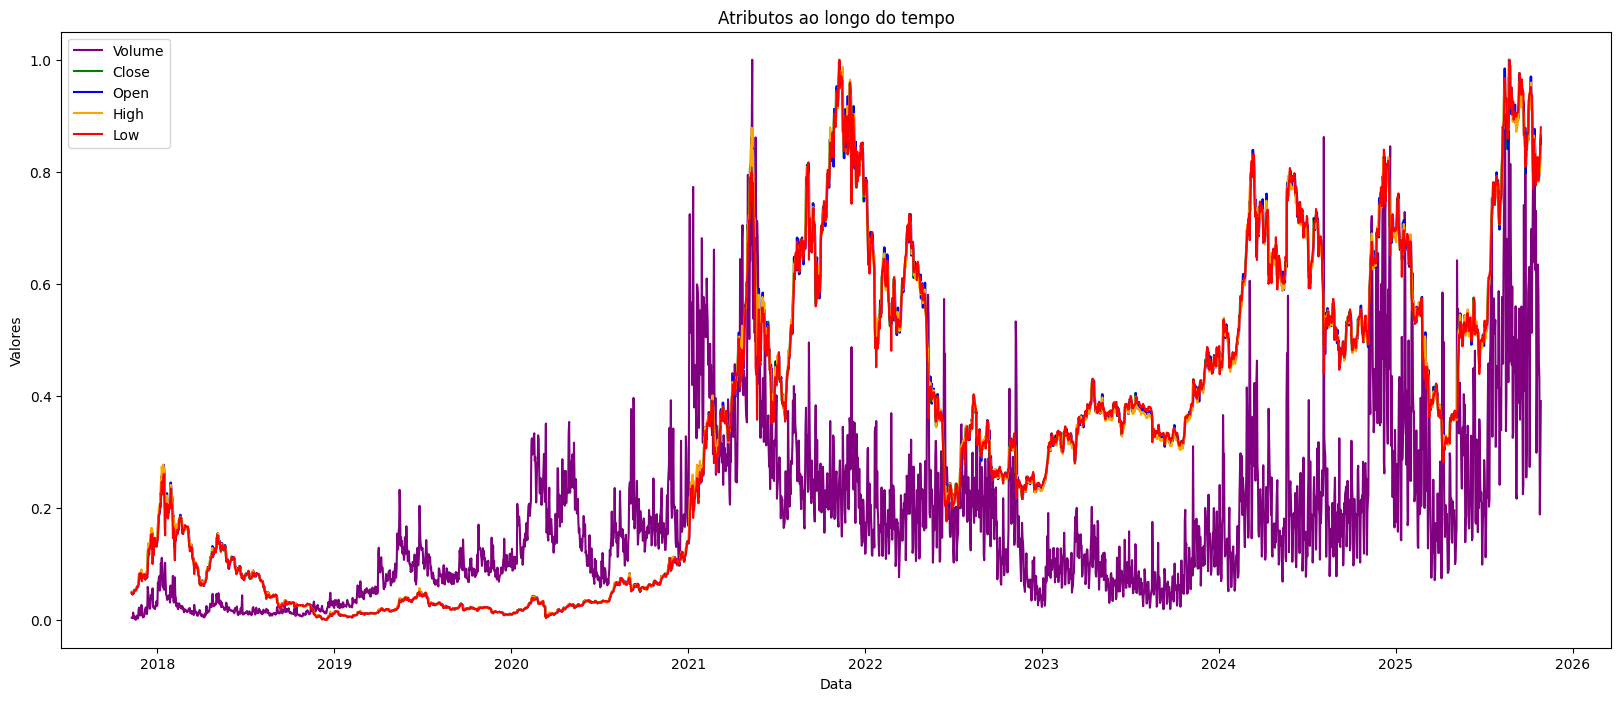

In [6]:
plt.figure(figsize=(20,8))

plt.plot(data_scaled.index, data_scaled['Volume'], label='Volume', color='purple')
plt.plot(data_scaled.index, data_scaled['Close'], label='Close', color='green')
plt.plot(data_scaled.index, data_scaled['Open'], label='Open', color='blue')
plt.plot(data_scaled.index, data_scaled['High'], label='High', color='orange')
plt.plot(data_scaled.index, data_scaled['Low'], label='Low', color='red')

plt.title('Atributos ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.show()

#### Adicionando Google Trends

In [7]:
from pytrends.request import TrendReq
import pandas as pd
import time

# Configuração PyTrends
pytrends = TrendReq(hl='en-US', tz=360)

# Termos que você quer pesquisar
kw_list = ["ethereum", "eth"]

# Função para gerar intervalos anuais entre datas inicial e final
def generate_halfyear_intervals(start_year, start_month, start_day, end_year, end_month, end_day):
    intervals = []
    current_start = pd.Timestamp(year=start_year, month=start_month, day=start_day)
    final_end = pd.Timestamp(year=end_year, month=end_month, day=end_day)

    while current_start < final_end:
        current_end = current_start + pd.DateOffset(months=6) - pd.DateOffset(days=1)
        if current_end > final_end:
            current_end = final_end
        intervals.append((current_start.strftime('%Y-%m-%d'), current_end.strftime('%Y-%m-%d')))
        current_start = current_end + pd.DateOffset(days=1)
    return intervals

intervals = generate_halfyear_intervals(2017, 11, 9, 2025, 10, 27)

dfs = []

# Loop para buscar os dados de cada intervalo
for start, end in intervals:
    print(f"Buscando dados de {start} até {end}...")
    pytrends.build_payload(kw_list, cat=0, timeframe=f'{start} {end}', geo='')
    
    # Tentar pegar os dados e lidar com possíveis falhas
    try:
        df = pytrends.interest_over_time()
        if not df.empty:
            dfs.append(df)
    except Exception as e:
        print(f"Erro ao buscar dados: {e}")
    
    # Espera para não ser bloqueado
    time.sleep(90)  

# Concatenar todos os intervalos em um único DataFrame
interest_over_time_df = pd.concat(dfs)
interest_over_time_df = interest_over_time_df[~interest_over_time_df.index.duplicated(keep='first')]


Buscando dados de 2017-11-09 até 2018-05-08...
Buscando dados de 2018-05-09 até 2018-11-08...
Buscando dados de 2018-11-09 até 2019-05-08...
Buscando dados de 2019-05-09 até 2019-11-08...
Buscando dados de 2019-11-09 até 2020-05-08...
Buscando dados de 2020-05-09 até 2020-11-08...
Buscando dados de 2020-11-09 até 2021-05-08...
Buscando dados de 2021-05-09 até 2021-11-08...
Buscando dados de 2021-11-09 até 2022-05-08...
Buscando dados de 2022-05-09 até 2022-11-08...
Buscando dados de 2022-11-09 até 2023-05-08...
Buscando dados de 2023-05-09 até 2023-11-08...
Buscando dados de 2023-11-09 até 2024-05-08...
Buscando dados de 2024-05-09 até 2024-11-08...
Buscando dados de 2024-11-09 até 2025-05-08...
Buscando dados de 2025-05-09 até 2025-10-27...
Erro ao buscar dados: The request failed: Google returned a response with code 429


In [8]:
# Mostrar os primeiros dados
interest_over_time_df.head(10)

,ethereum,eth,isPartial
date,,,
2017-11-09,23,9,False
2017-11-10,20,8,False
2017-11-11,20,6,False
2017-11-12,23,7,False
2017-11-13,19,8,False
2017-11-14,21,8,False
2017-11-15,20,9,False
2017-11-16,18,8,False
2017-11-17,18,8,False


In [9]:
# Seleciona apenas as colunas de interesse do Google Trends
trends_cols = interest_over_time_df[["ethereum", "eth"]]

# Faz o merge pelo índice de datas
data_merged = data.merge(trends_cols, left_index=True, right_index=True, how='left')


In [10]:
data_merged.head(10)

,Close,High,Low,Open,Volume,ethereum,eth
Date,,,,,,,
2017-11-09,320.884003,329.451996,307.056000,308.644989,893249984,23.0,9.0
2017-11-10,299.252991,324.717987,294.541992,320.670990,885985984,20.0,8.0
2017-11-11,314.681000,319.453003,298.191986,298.585999,842300992,20.0,6.0
2017-11-12,307.907990,319.153015,298.513000,314.690002,1613479936,23.0,7.0
2017-11-13,316.716003,328.415009,307.024994,307.024994,1041889984,19.0,8.0
2017-11-14,337.631012,340.177002,316.763000,316.763000,1069680000,21.0,8.0
2017-11-15,333.356995,340.911987,329.812988,337.963989,722665984,20.0,9.0
2017-11-16,330.924011,336.158997,323.605988,333.442993,797254016,18.0,8.0
2017-11-17,332.394012,334.963989,327.523010,330.166992,621732992,18.0,8.0


In [11]:
data_merged.isna().sum()

Close         0
High          0
Low           0
Open          0
Volume        0
ethereum    170
eth         170
dtype: int64

In [12]:
# data_merged.drop(columns="bitcoin")

In [13]:
# data_merged.to_csv('../../data/processed/ETH-USD_crypto_all.csv', index=True)

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_merged)
data_scaled = pd.DataFrame(scaled_data, columns=data_merged.columns, index=data_merged.index)

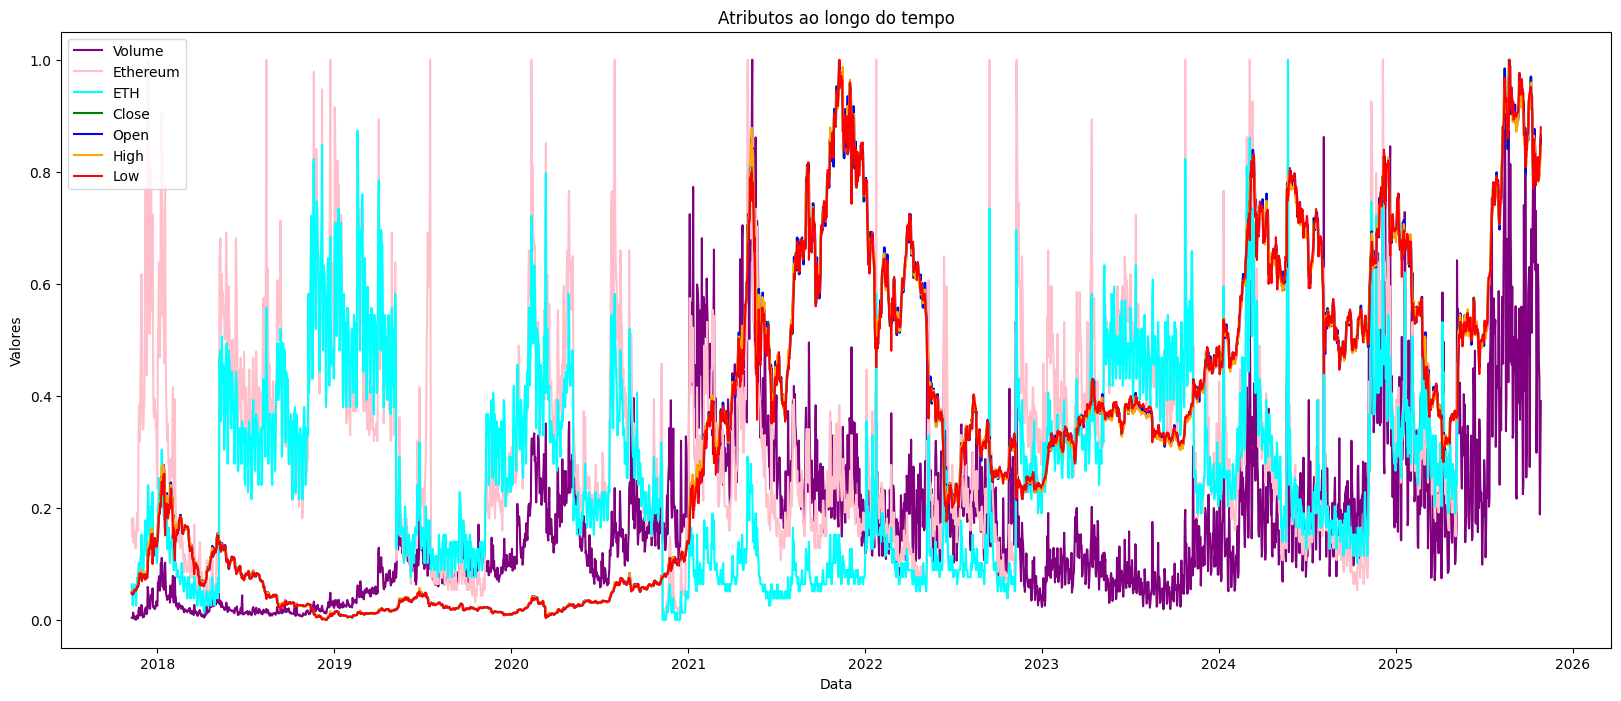

In [15]:
plt.figure(figsize=(20,8))

plt.plot(data_scaled.index, data_scaled['Volume'], label='Volume', color='purple')
plt.plot(data_scaled.index, data_scaled['ethereum'], label='Ethereum', color='pink')
plt.plot(data_scaled.index, data_scaled['eth'], label='ETH', color='cyan')
plt.plot(data_scaled.index, data_scaled['Close'], label='Close', color='green')
plt.plot(data_scaled.index, data_scaled['Open'], label='Open', color='blue')
plt.plot(data_scaled.index, data_scaled['High'], label='High', color='orange')
plt.plot(data_scaled.index, data_scaled['Low'], label='Low', color='red')


plt.title('Atributos ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.show()

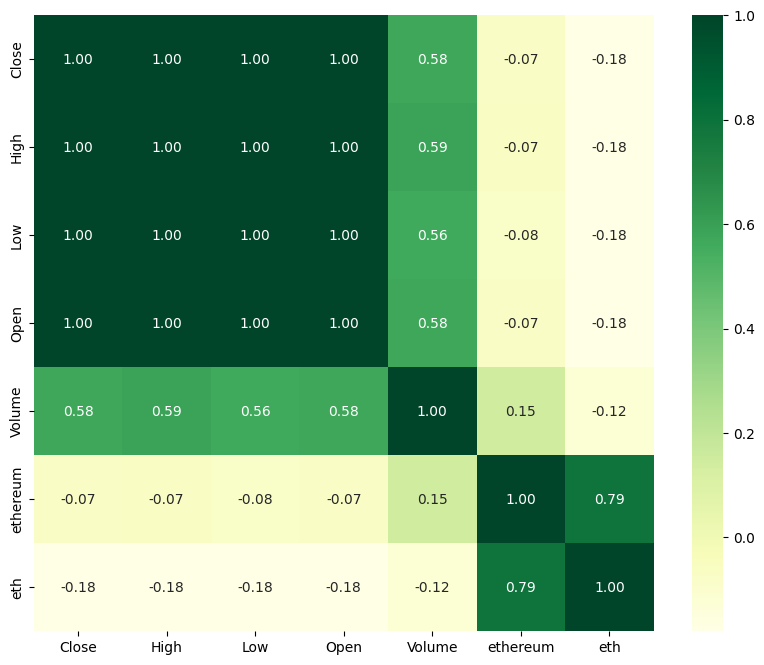

In [16]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(data_merged.corr(), annot=True, cmap="YlGn", fmt=".2f")
plt.show()